
# I: Introduction
Dans ce projet, nous allons travailler sur l'ensemble de données « Inclusion financière en Afrique » qui a été fourni dans le cadre de l'Inclusion financière en Afrique hébergée par la plateforme Z Zindi

# II: Description de l'ensemble de données :

L'ensemble de données contient des informations démographiques et les services financiers utilisés par environ 33 600 personnes en Afrique de l'Est.
Le terme inclusion financière signifie que les particuliers et les entreprises ont accès à des produits et services financiers utiles et abordables qui répondent à leurs besoins – transactions, paiements, épargne, crédit et assurance – fournis de manière responsable et durable.

**Objectif:** Le rôle du modèle ML est de prédire quelles personnes qui sont les plus susceptibles d'avoir ou d'utiliser un compte bancaire

# III:
## 1: installer les librairies necessaires
## 2: Charger la base de donnée

- Afficher des informations générales sur l'ensemble de données
- Créez des rapports de profilage de pandas pour obtenir des informations sur l'ensemble de données
- Gérer les valeurs manquantes et corrompues
- Supprimer les doublons, s'ils existent
- Gérer les valeurs aberrantes, si elles existent

## 3.Encoder les caractéristiques catégorielles

## 4.Sur la base de l'exploration des données précédentes, former et tester un classificateur d'apprentissage automatique

## 5.Créez une application simplifiée (en local) et ajoutez des champs de saisie pour vos fonctionnalités et un bouton de validation à la fin du formulaire

## 6.Importez votre modèle ML dans l'application Streamlit et commencez à faire des prédictions en fonction des valeurs de fonctionnalités fournies

## 7.Déployez votre application sur le partage Streamlit :

- Créer un compte de partage GitHub et Streamlit
- Créer un nouveau dépôt git
- Téléchargez votre code local dans le dépôt git nouvellement créé
- connectez-vous à votre compte Streamlit et déployez votre application à partir du dépôt Git

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Installation des librairies necessaires

In [2]:
#importation des packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install ydata_profiling
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

import warnings #IGNORER LES ALERTES
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=a21e4db6d5a028bea4a0f0a19757178520982a72f41009aff573d19a9378c538
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


2. Chargement de la base de données

In [3]:
data = pd.read_csv("/content/drive/MyDrive/GOMYCODE PARTAGER/Financial_inclusion_dataset.csv")
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


3. Analyse Exploratoire des données

In [ ]:
# Afficher les informations générales

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [4]:
# Convertion de l'année en datetime

data['year'] = pd.to_datetime(data['year'], format='%Y').dt.year
data['year']

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
23519    2018
23520    2018
23521    2018
23522    2018
23523    2018
Name: year, Length: 23524, dtype: int32

In [ ]:
# Résumé statistique des données numeriques

data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [ ]:
# Profilage du jeu de données

profil = ProfileReport(data)
profil

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Vérification du pourcentage des valeurs manquantes

effectif = data.shape[0]
pourcentage = (data.isnull().sum() / effectif) * 100
pourcentage = pourcentage.sort_values(ascending=False)
pd.concat([pourcentage, data.isnull().sum()], axis=1, keys=['Pourcentage', 'Effectif'])

,Pourcentage,Effectif
country,0.0,0
year,0.0,0
uniqueid,0.0,0
bank_account,0.0,0
location_type,0.0,0
cellphone_access,0.0,0
household_size,0.0,0
age_of_respondent,0.0,0
gender_of_respondent,0.0,0
relationship_with_head,0.0,0


In [6]:
# Vérification des valeurs manquantes

data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

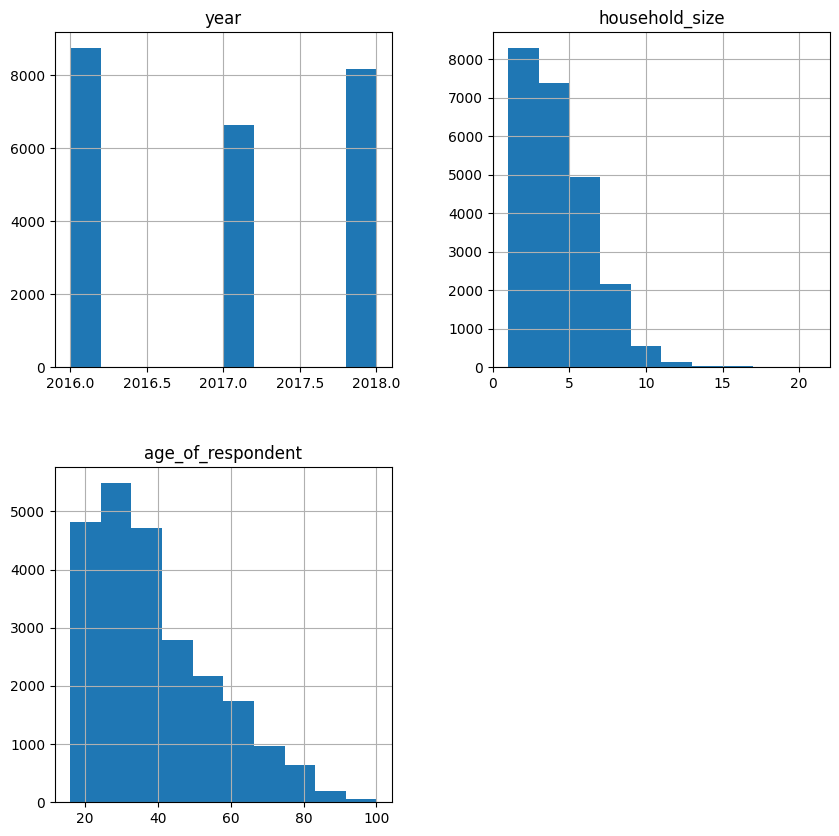

In [7]:
# Histogramme des variables numériques

data.hist(figsize=(10,10))
plt.show()

D'après l'histogramme, les variables numériques de l'ensemble de données ne suivent pas la loi Gaussienne. Les variables ne sont pas bien reparties ce necessite une normalisation MinMax

In [8]:
# Résumé statistique des variables catégorielles

data.describe(include='object')

,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,8735,2,2,2,2,6,5,6,10
top,Rwanda,uniqueid_1,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,20212,14343,17454,13877,12831,10749,12791,6437


In [9]:
# Suppression de la colonne uniqueid

data.drop('uniqueid', axis=1, inplace=True)
data

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


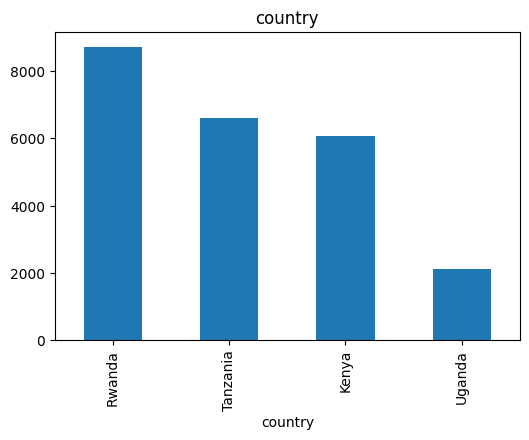

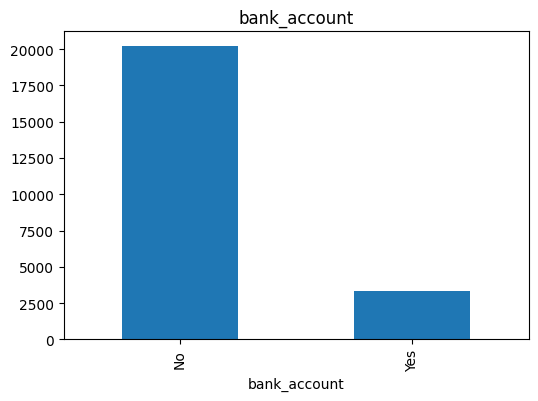

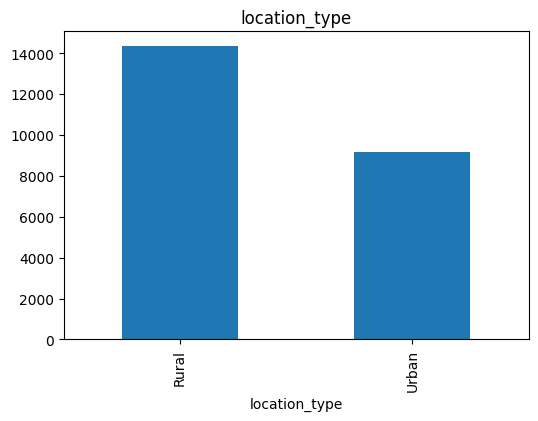

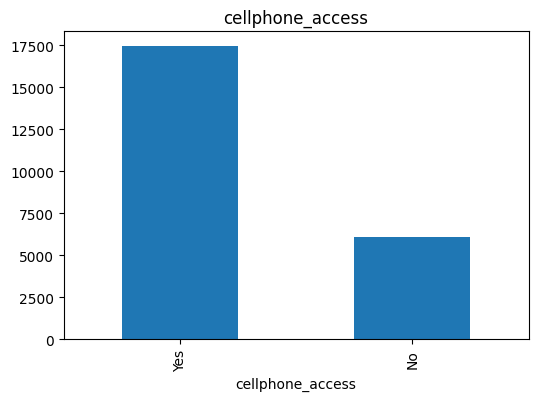

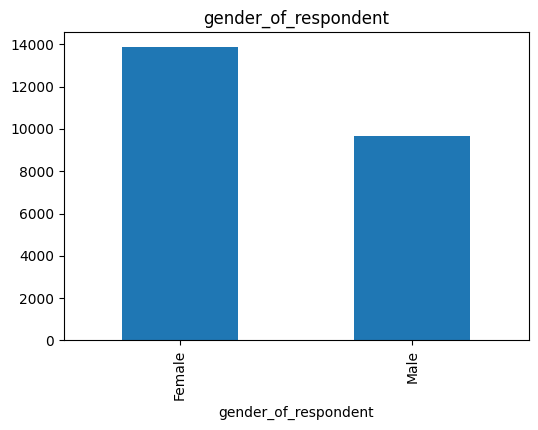

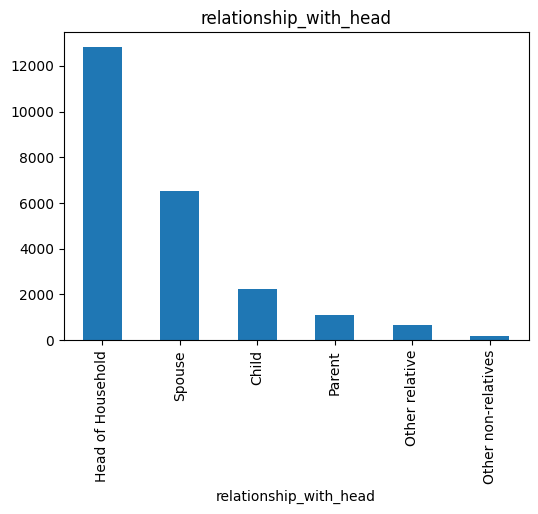

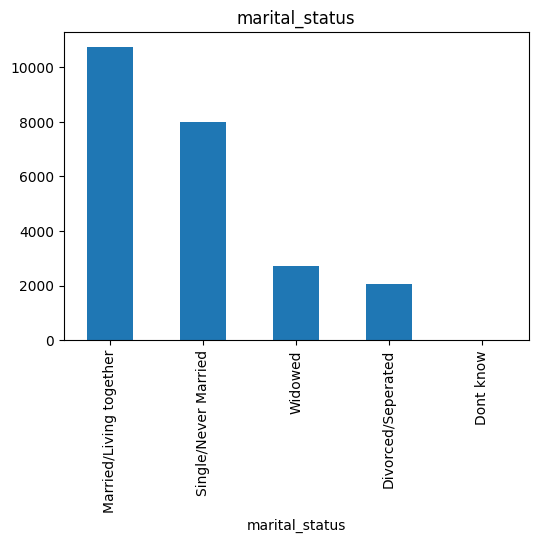

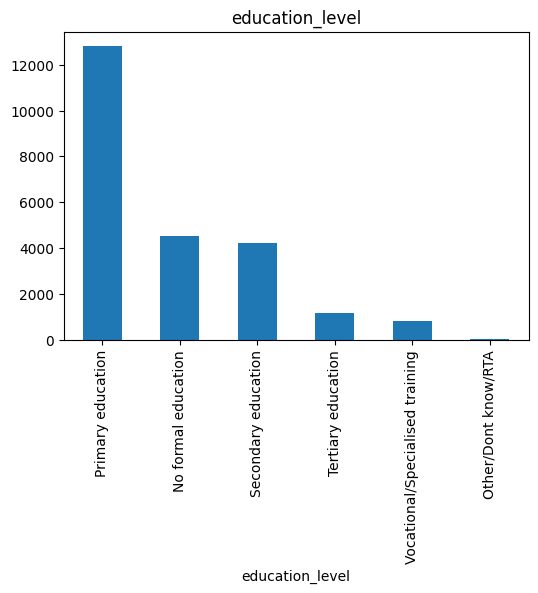

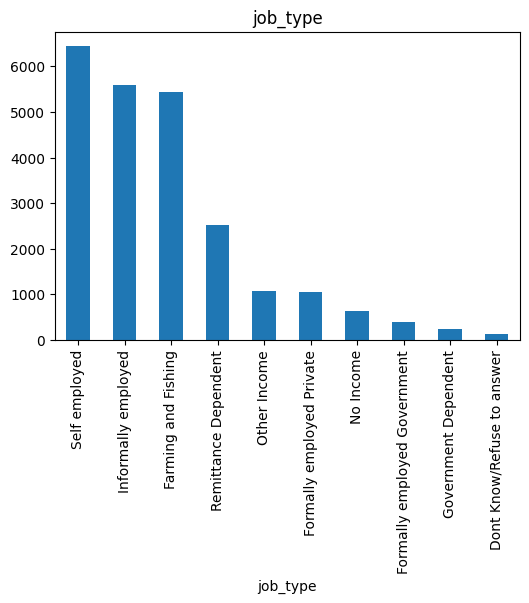

In [10]:
# Vérification de la répartition des variables catégorielles à l'aide de Diagramme à barre

  # Diagramme à barre pour les toutes les variables catégorielles
for col in data.select_dtypes(include=['object']).columns:
    data[col].value_counts().plot(kind='bar', figsize=(6, 4))
    plt.title(col)
    plt.show()

Notre jeu de données contient **23524 observation** et **13 Colonnes**

In [11]:
## ANALYSE BIVARIEE

<Figure size 1200x500 with 0 Axes>

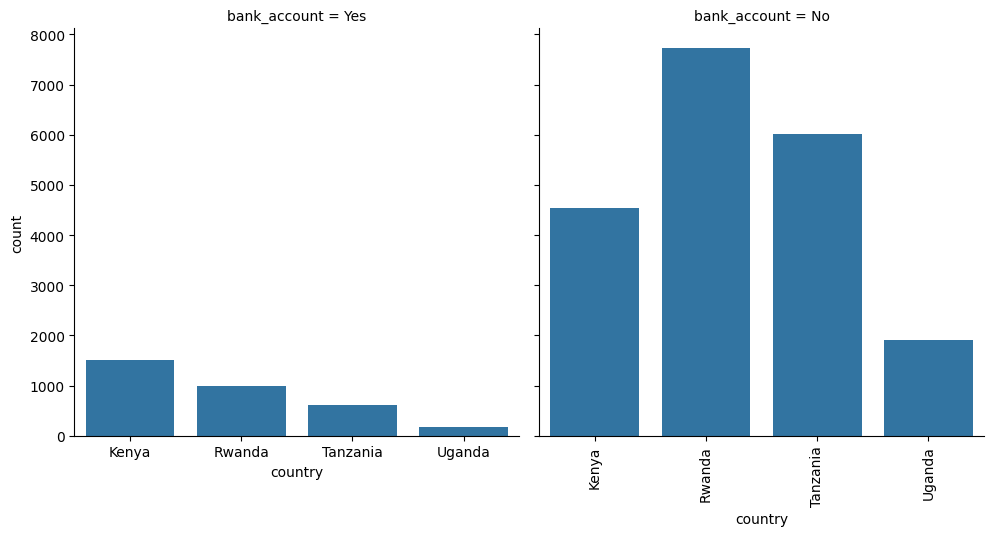

<Figure size 1200x500 with 0 Axes>

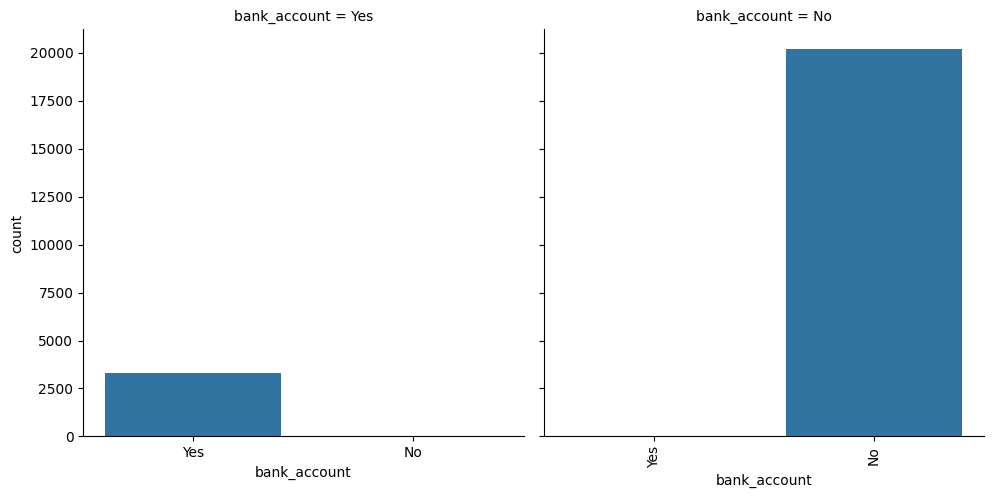

<Figure size 1200x500 with 0 Axes>

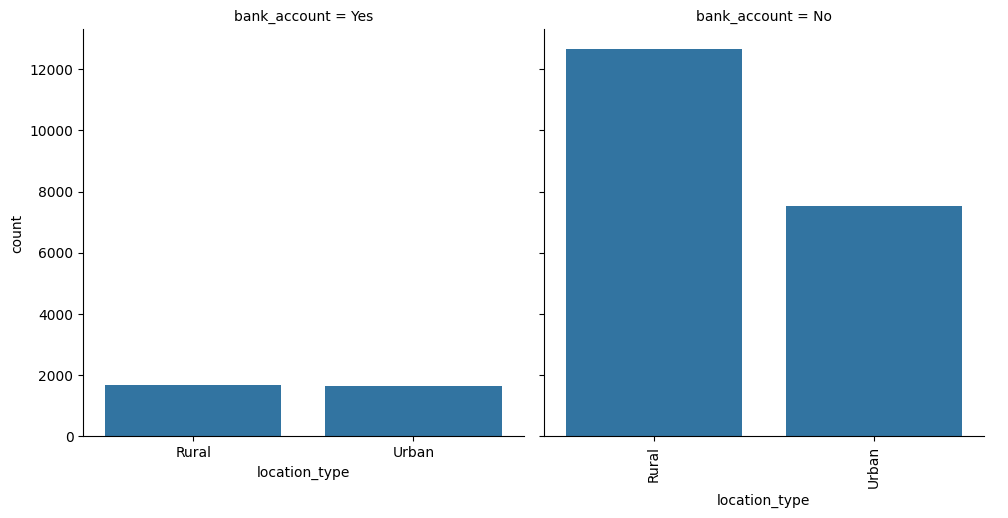

<Figure size 1200x500 with 0 Axes>

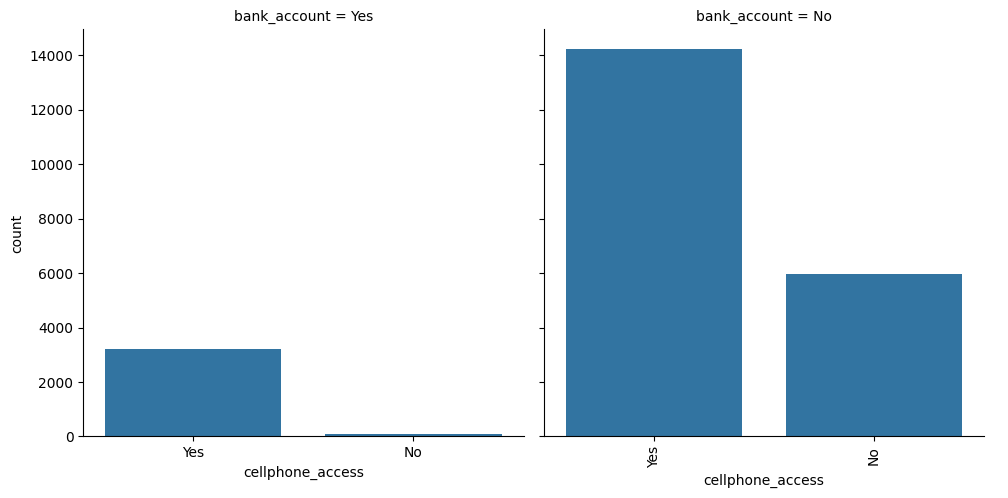

<Figure size 1200x500 with 0 Axes>

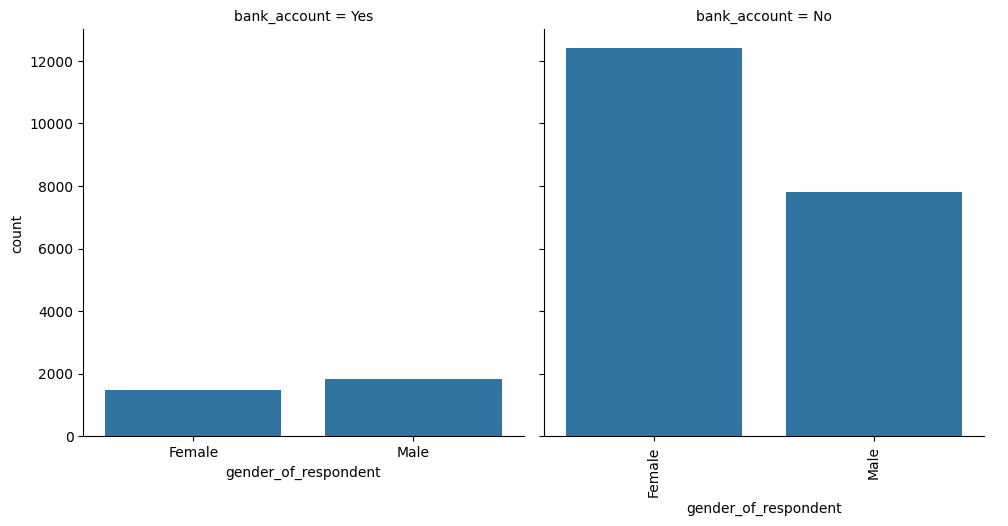

<Figure size 1200x500 with 0 Axes>

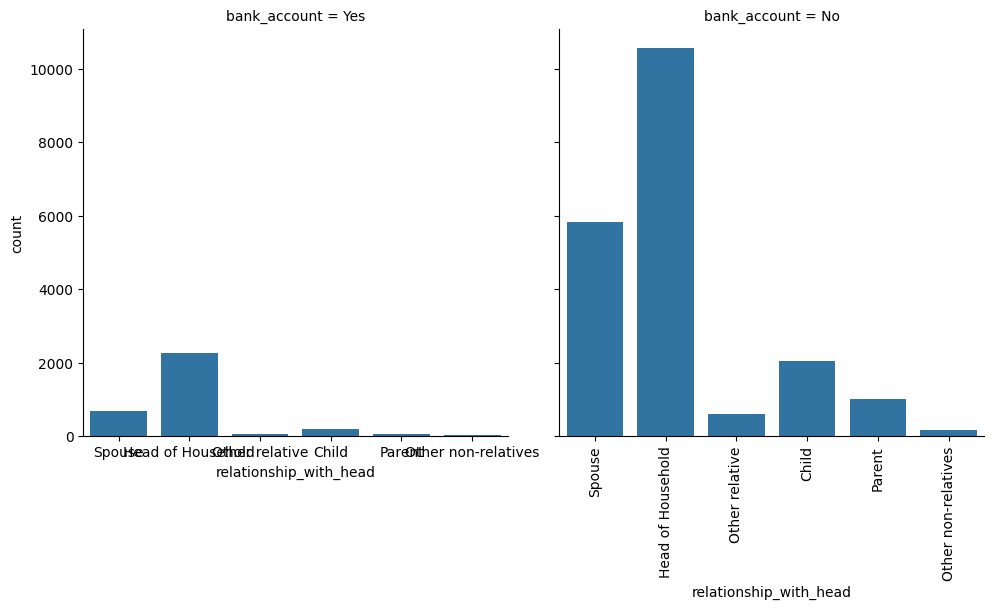

<Figure size 1200x500 with 0 Axes>

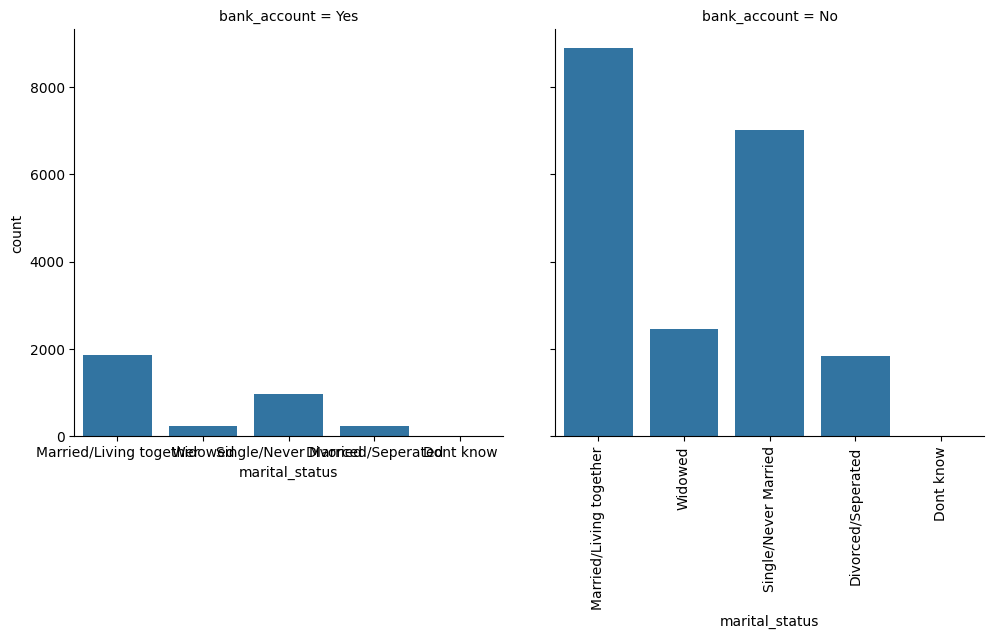

<Figure size 1200x500 with 0 Axes>

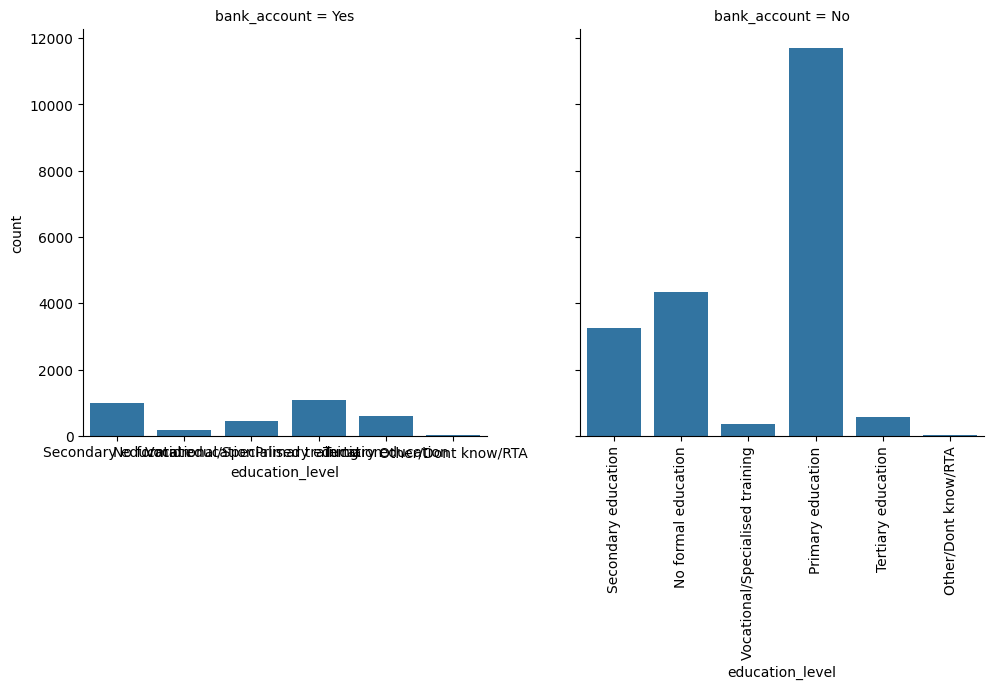

<Figure size 1200x500 with 0 Axes>

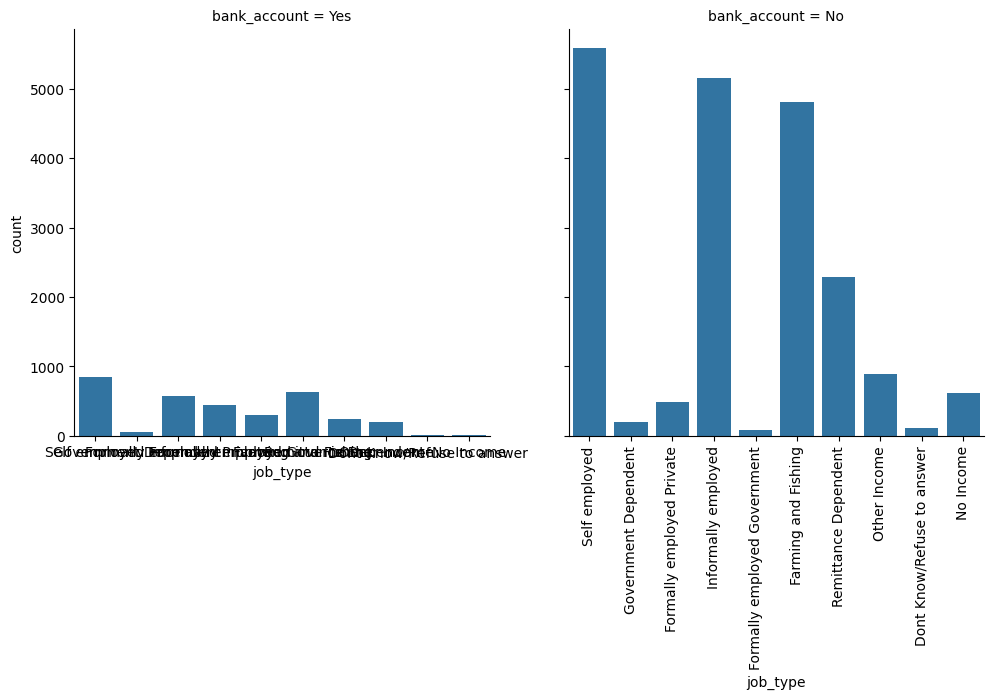

In [12]:
# Relation entre la variable cible (bank_account) et le variables catégorielles

col_cat = data.select_dtypes(include=['object']).columns

for var in col_cat:
    plt.figure(figsize=(12,5))

    sns.catplot(x=var ,col="bank_account", data=data, kind="count")
    plt.xticks(rotation=90)
    plt.show()

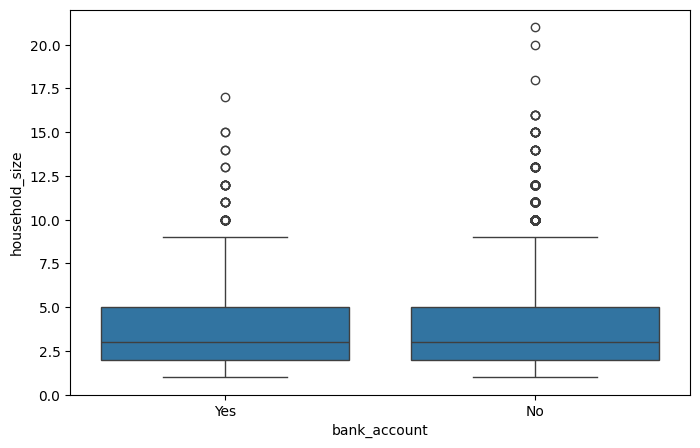

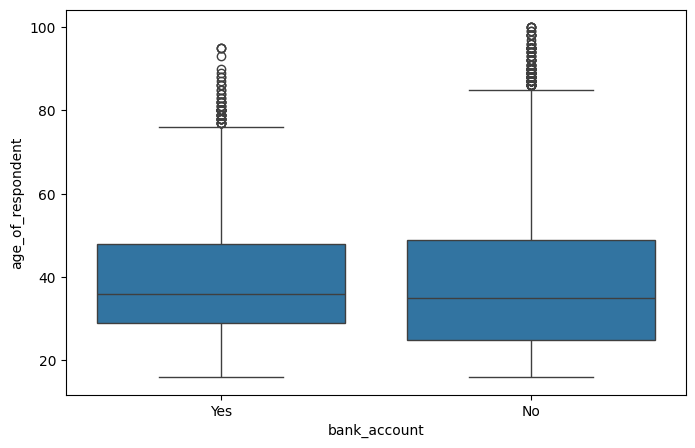

In [13]:
# Relation entre la variable cible (bank_account) et le variables numériques

num_var = data.select_dtypes(include=['int64','float64']).columns

for var in num_var:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="bank_account", y=var, data=data)
    plt.show()

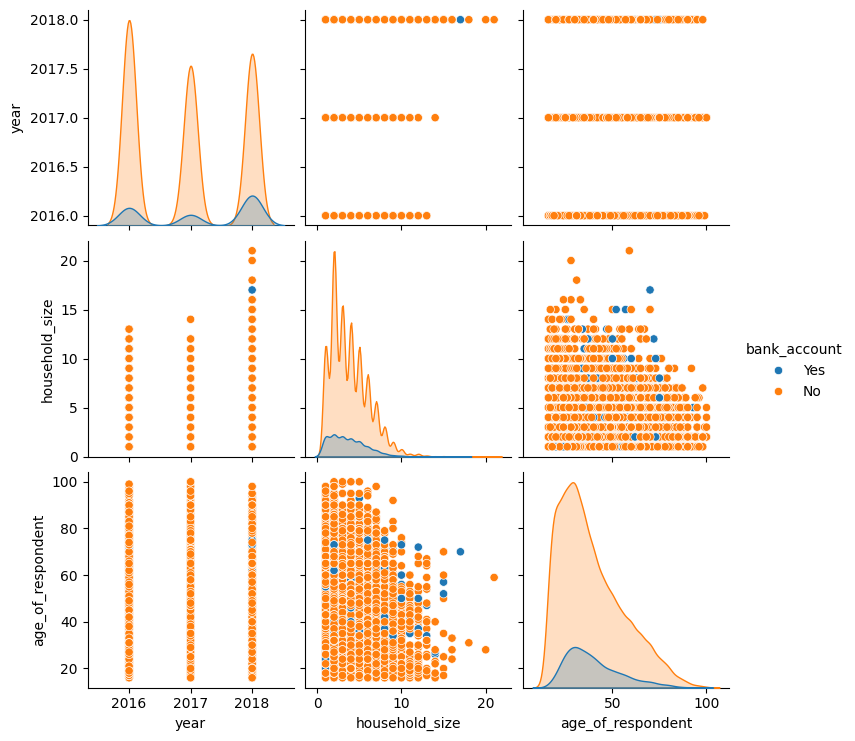

In [14]:
# Autres méthodes pour relation entre la variable cible (bank_account) et le variables numériques

sns.pairplot(data, hue="bank_account")
plt.show()

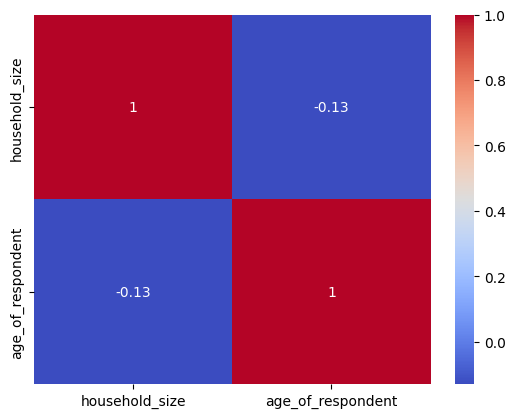

In [15]:
# Faire le heatmap avec les variables numériques

# Select numerical columns
numerical_data = data.select_dtypes(include=['int64','float64'])

sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

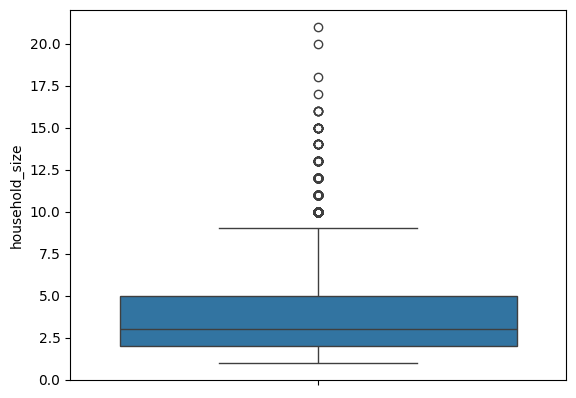

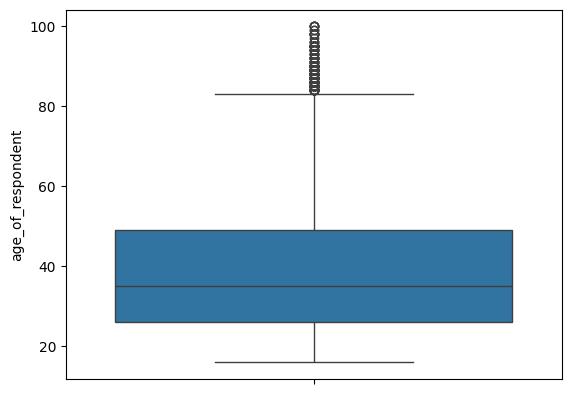

In [16]:
# Faire un boxplot pour chaque variables numériques

for col in data.select_dtypes(include=['int64','float64']).columns:
    sns.boxplot(data[col])
    plt.show()



In [17]:
df = data.copy()
df

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


PRETRAITEMENT ET MODELISATION

## Encodage
Appliquons un encodage à chaud sur les variables non-binaires et un label_encodeur sur les variables binaires

In [18]:
# Encodage à chaud de variables catégoriables
df[col_cat].nunique()

country                    4
bank_account               2
location_type              2
cellphone_access           2
gender_of_respondent       2
relationship_with_head     6
marital_status             5
education_level            6
job_type                  10
dtype: int64

In [19]:
cols_num = data.select_dtypes(include=['int64','float64']).columns.tolist()
cols_num

['household_size', 'age_of_respondent']

In [20]:
# encodage
# selection de toutes les variables categorielles
col_cat=data.select_dtypes(include='object').columns.tolist()
data[col_cat].nunique()

country                    4
bank_account               2
location_type              2
cellphone_access           2
gender_of_respondent       2
relationship_with_head     6
marital_status             5
education_level            6
job_type                  10
dtype: int64

In [21]:
# Selection des variables categorielles binaires

var_binaire = data[col_cat].nunique()[data[col_cat].nunique() == 2].index.tolist()
var_binaire

['bank_account', 'location_type', 'cellphone_access', 'gender_of_respondent']

In [22]:
# Selection des variables categorielles non-binaires
var_non_binaire = data[col_cat].nunique()[data[col_cat].nunique() > 2].index.tolist()
var_non_binaire

['country',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [23]:
# appliquons un encodage à chaud aux variables binaire

# creation d'une copy
df=data.copy()

le=LabelEncoder()
for col in var_binaire:
    df[col]= le.fit_transform(df[col])

In [24]:
# verification
data_binairies=df[var_binaire]
data_binairies.head(3)

,bank_account,location_type,cellphone_access,gender_of_respondent
0,1,0,1,0
1,0,0,0,0
2,1,1,1,1


In [25]:
# appliquans une get_dummies aux variables non binaire
data_not_binaries=pd.get_dummies(df[var_non_binaire], columns=var_non_binaire).astype(int)
data_not_binaries.head()

,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
# regroupons les données traitées: data_num,data_binaire et data_not_binaire
new_data=pd.concat([df[cols_num],data_binairies,data_not_binaries],axis=1)
new_data

,household_size,age_of_respondent,bank_account,location_type,cellphone_access,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,3,24,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5,70,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5,26,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5,34,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,26,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,4,48,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
23520,2,27,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
23521,5,27,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
23522,7,30,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


MODELISATION

Nous allons utiliser un RandomForest pour la modelisation

In [27]:
# Division du jeu de données en données de test et d'entraînement

X = new_data.drop('bank_account', axis=1)
y = new_data['bank_account']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Normalisation du jeu de données

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled =pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

In [54]:
# Entraînement du jeu de données par un RandomForest

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [55]:
# Prédiction du modèle

y_pred = model_rf.predict(X_test_scaled)

In [56]:
def evaluation_modele(model):
    y_pred_train = model.predict(X_train_scaled)

    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    print("Accuracy sur les données d'entraînement:", accuracy_train)
    print("Precision sur les données d'entraînement:", precision_train)
    print("Recall sur les données d'entraînement:", recall_train)
    print("\n")
    y_pred_test = model.predict(X_test)

    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print("Accuracy sur les données de test:", accuracy_test)
    print("Precision sur les données de test:", precision_test)
    print("Recall sur les données de test:", recall_test)

In [57]:
# Evaluation du model RandomForest

evaluation_modele(model_rf)

Accuracy sur les données d'entraînement: 0.9803921568627451
Precision sur les données d'entraînement: 0.9709373720835038
Recall sur les données d'entraînement: 0.8883895131086142


Accuracy sur les données de test: 0.8656748140276301
Precision sur les données de test: 0.5102459016393442
Recall sur les données de test: 0.3878504672897196


In [58]:
# Recherche des hyper-parametres pour l'optimisation du model avec GridSearchCV

hyperparameters = {
    'n_estimators': [5, 10, 20, 30],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

grid_search_rf = GridSearchCV(model_rf, hyperparameters, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)

print("Meilleur score:", grid_search_rf.best_score_)
print("Meilleur hyperparamètres:", grid_search_rf.best_params_)

Meilleur score: 0.8869760600375658
Meilleur hyperparamètres: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 30}


In [59]:
# Evaluation du model

evaluation_modele(grid_search_rf.best_estimator_)

Accuracy sur les données d'entraînement: 0.8998884106488124
Precision sur les données d'entraînement: 0.8119047619047619
Recall sur les données d'entraînement: 0.3831460674157303


Accuracy sur les données de test: 0.8892667375132838
Precision sur les données de test: 0.6666666666666666
Recall sur les données de test: 0.37694704049844235


MODELISATION A L'AIDE D'UN MODELE DE REGRESSION LOGISTIQUE

In [60]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [61]:
# Evaluation du model

evaluation_modele(logreg)

Accuracy sur les données d'entraînement: 0.8850629682767416
Precision sur les données d'entraînement: 0.691609977324263
Recall sur les données d'entraînement: 0.34269662921348315


Accuracy sur les données de test: 0.13645058448459085
Precision sur les données de test: 0.13645058448459085
Recall sur les données de test: 1.0


In [62]:
# Optimisation du model LR

hyperparameters = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']}

grid_search_logreg = GridSearchCV(logreg, hyperparameters, cv=5)
grid_search_logreg.fit(X_train_scaled, y_train)

print("Meilleur score:", grid_search_logreg.best_score_)
print("Meilleur hyperparamètres:", grid_search_logreg.best_params_)

Meilleur score: 0.8847974418403025
Meilleur hyperparamètres: {'C': 0.1, 'penalty': 'l2'}


In [63]:
# Evaluation du model

evaluation_modele(grid_search_logreg.best_estimator_)

Accuracy sur les données d'entraînement: 0.8847972793453425
Precision sur les données d'entraînement: 0.7011217948717948
Recall sur les données d'entraînement: 0.32771535580524347


Accuracy sur les données de test: 0.13645058448459085
Precision sur les données de test: 0.13645058448459085
Recall sur les données de test: 1.0


**Au vue des résultats d'évaluation de nos différents modèles on peut retenir que le modèle le plus adapté à resoudre notre problème est le modèle RandomForest car il a de bon indicateurs de performance. **

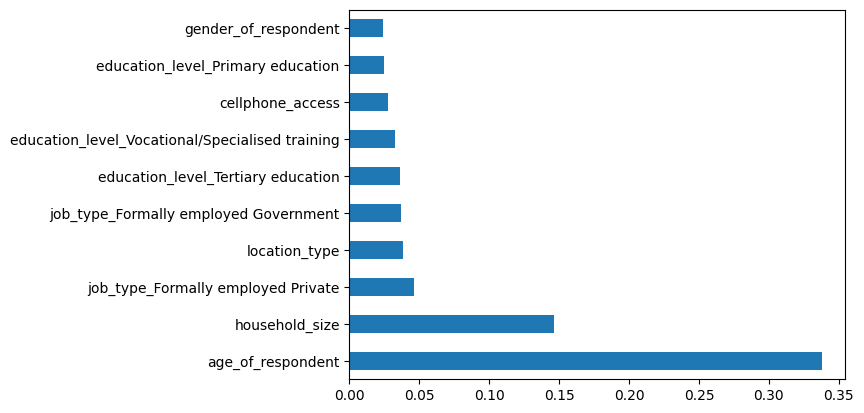

In [64]:
# Visualisation des variables les plus imortantes du model RandomForest

feature_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [65]:
feature_importances.sort_values(ascending=False)

age_of_respondent                                  0.337873
household_size                                     0.146579
job_type_Formally employed Private                 0.046214
location_type                                      0.038428
job_type_Formally employed Government              0.037112
education_level_Tertiary education                 0.035950
education_level_Vocational/Specialised training    0.032243
cellphone_access                                   0.027439
education_level_Primary education                  0.024473
gender_of_respondent                               0.024042
country_Kenya                                      0.022696
education_level_Secondary education                0.018755
job_type_Self employed                             0.017666
education_level_No formal education                0.017544
relationship_with_head_Head of Household           0.016182
marital_status_Married/Living together             0.014484
job_type_Informally employed            

In [66]:
# Selection des variables les plus importantes

selected_features = feature_importances[feature_importances >= 0.024].index.tolist()
selected_features

['household_size',
 'age_of_respondent',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'education_level_Primary education',
 'education_level_Tertiary education',
 'education_level_Vocational/Specialised training',
 'job_type_Formally employed Government',
 'job_type_Formally employed Private']

In [70]:
# Convert the list of column names to numerical indices
#selected_indices = [X.columns.get_loc(col) for col in selected_features]

# Now use these numerical indices to select the columns
X_train_scaled_selected = X_train_scaled[selected_features]
X_test_scaled_selected = X_test_scaled[selected_features]

In [71]:
# Entrainement du model
model_rf_end = grid_search_rf.best_estimator_
model_rf_end.fit(X_train_scaled_selected, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=30, random_state=42)

In [72]:
# Evaluation du model sur les données d'entrainement

y_pred_train = model_rf_end.predict(X_train_scaled_selected)
print("Accuracy sur les données d'entraînement:", accuracy_score(y_train, y_pred_train))
print("Precision sur les données d'entraînement:", precision_score(y_train, y_pred_train))
print("Recall sur les données d'entraînement:", recall_score(y_train, y_pred_train))

Accuracy sur les données d'entraînement: 0.8971783835485414
Precision sur les données d'entraînement: 0.7956556717618665
Recall sur les données d'entraînement: 0.3704119850187266


In [73]:
y_pred_test = model_rf_end.predict(X_test_scaled_selected)
print("Accuracy sur les données de test:", accuracy_score(y_test, y_pred_test))
print("Precision sur les données de test:", precision_score(y_test, y_pred_test))
print("Recall sur les données de test:", recall_score(y_test, y_pred_test))

Accuracy sur les données de test: 0.8792773645058448
Precision sur les données de test: 0.6217105263157895
Recall sur les données de test: 0.29439252336448596


In [74]:
# Enregistrement du model RandomForest

#import joblib
#joblib.dump(model_rf_end, 'model_rf.pkl')

In [75]:
# Enregistrement du model RandomForest
import pickle as pkl

file = open("model_rf_end.pkl", "wb")
pkl.dump(model_rf_end, file)
file.close()
